Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

# Load Dataset

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Clustered_Customer_Data.csv")

In [3]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [4]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [5]:
df.shape

(8950, 18)

In [6]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')

# Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


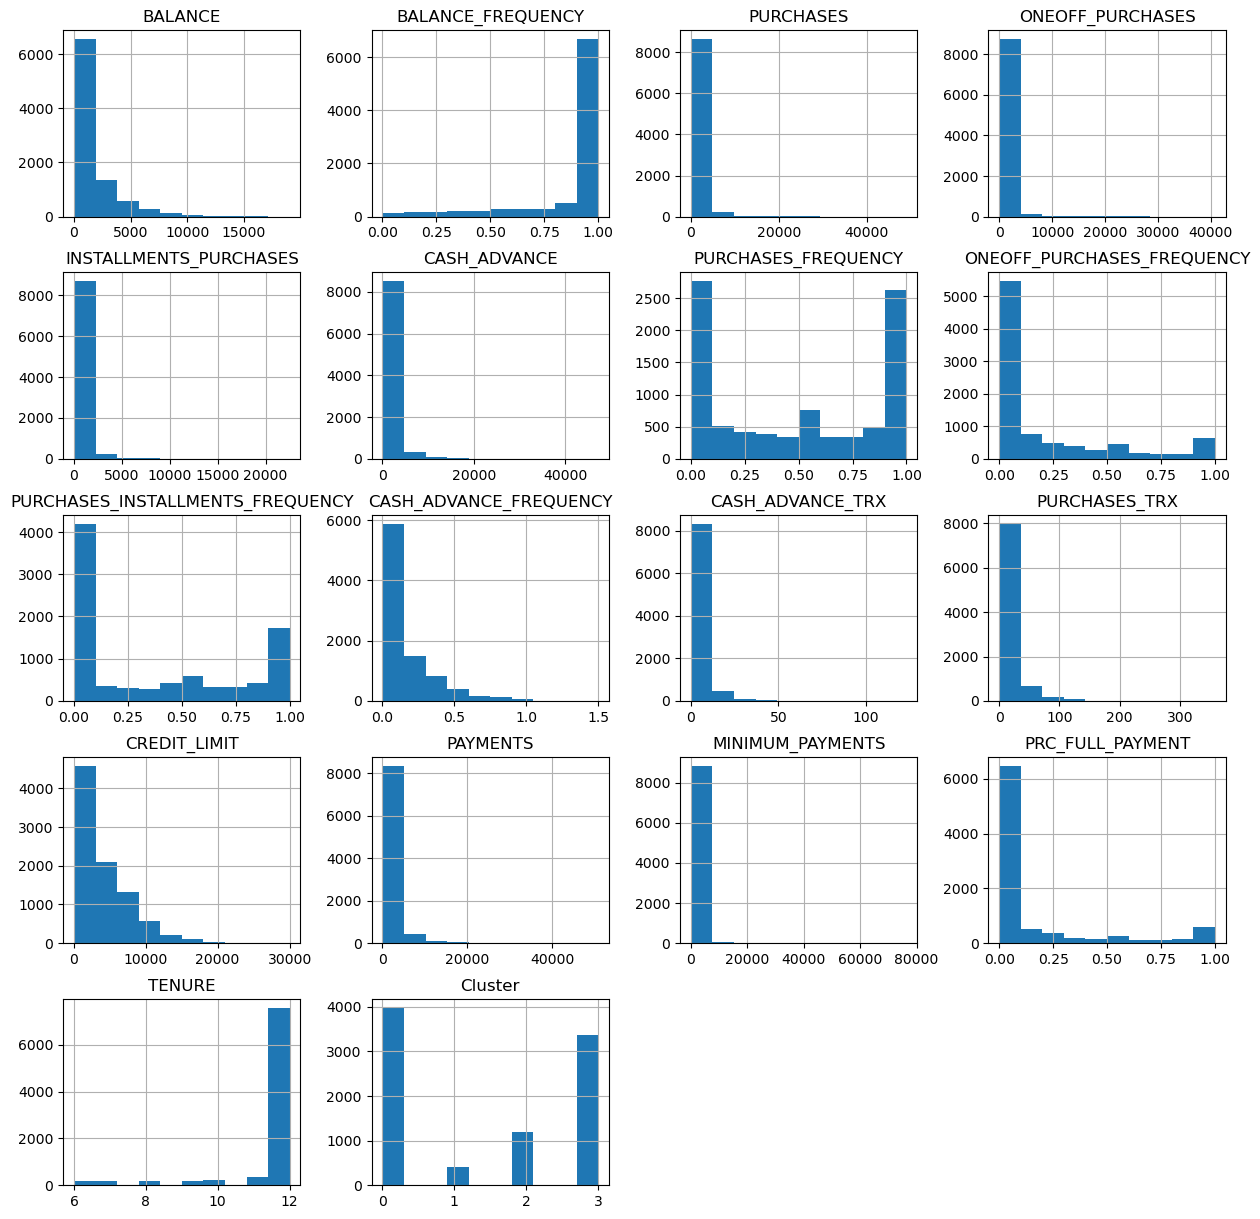

In [10]:
df.hist(figsize=(15, 15))
plt.show()

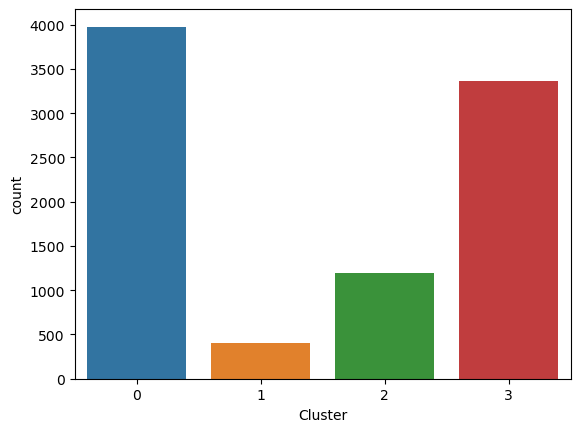

In [11]:
sns.countplot(x=df['Cluster'], data=df) 
plt.show() 

# Data Preprocessing

In [12]:
# find outlier in all columns
for i in df.select_dtypes(include=['float64','int64']).columns:
  max_thresold= df[i].quantile(0.95)
  min_thresold= df[i].quantile(0.05)
  df_no_outlier= df[(df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((df.shape[0]-df_no_outlier[0])/df.shape[0])*100),"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %
 outlier in  Cluster is 82 %


In [13]:
# remove outliers from columns having nearly 10% outlier
max_thresold_BALANCE = df["BALANCE"].quantile(0.95)
min_thresold_BALANCE = df["BALANCE"].quantile(0.05)

max_thresold_CREDIT_LIMIT=df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT=df["CREDIT_LIMIT"].quantile(0.05)

max_thresold_PAYMENTS=df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS=df["PAYMENTS"].quantile(0.05)

max_thresold_MINIMUM_PAYMENTS = df["MINIMUM_PAYMENTS"].quantile(0.95)
min_thresold_MINIMUM_PAYMENTS = df["MINIMUM_PAYMENTS"].quantile(0.05)

df_no_outlier=df[(df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & \
                (df["BALANCE"] < max_thresold_BALANCE) & (df["BALANCE"] > min_thresold_BALANCE) &  \
                (df["PAYMENTS"] < max_thresold_PAYMENTS) & (df["PAYMENTS"] > min_thresold_PAYMENTS) & \
                (df["MINIMUM_PAYMENTS"] < max_thresold_MINIMUM_PAYMENTS) & (df["MINIMUM_PAYMENTS"] > min_thresold_MINIMUM_PAYMENTS)]

df_no_outlier.shape

(6074, 18)

<Axes: >

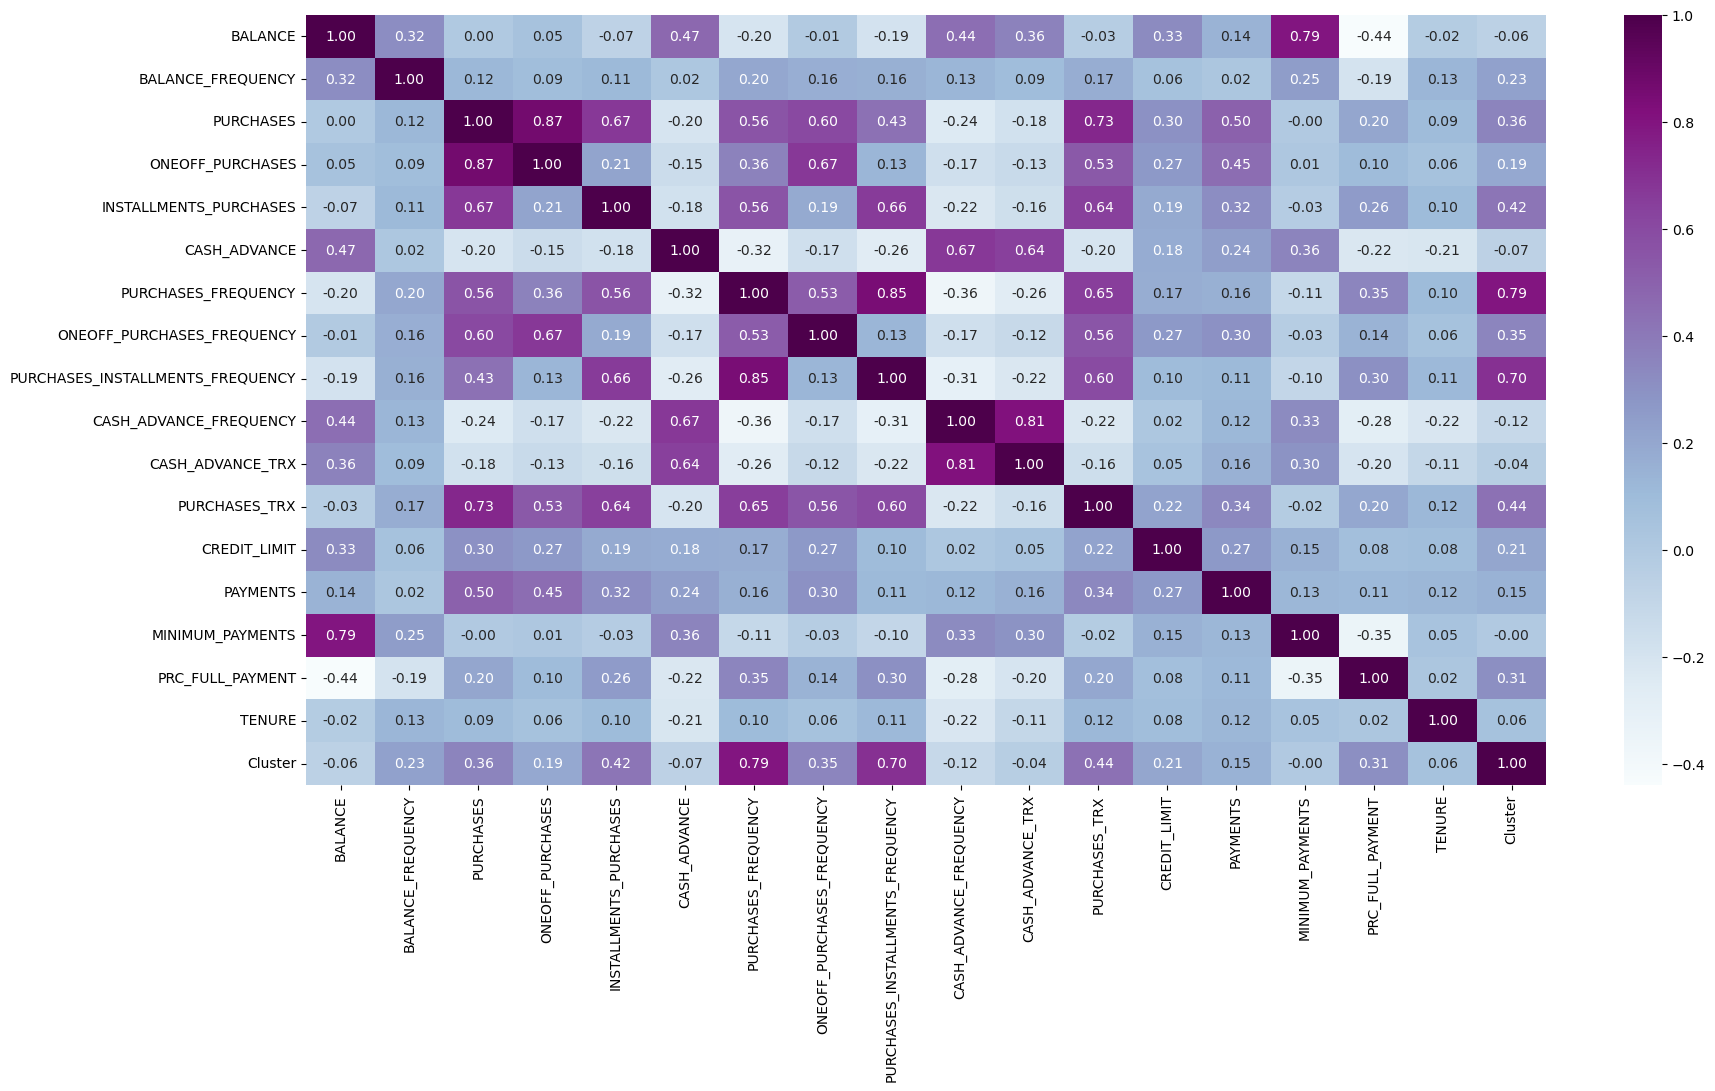

In [14]:
plt.figure(figsize=(20,10))
corn = df_no_outlier.corr()
sns.heatmap(corn,annot=True,cmap="BuPu",fmt='.2f')

In [15]:
# normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_outlier.values)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

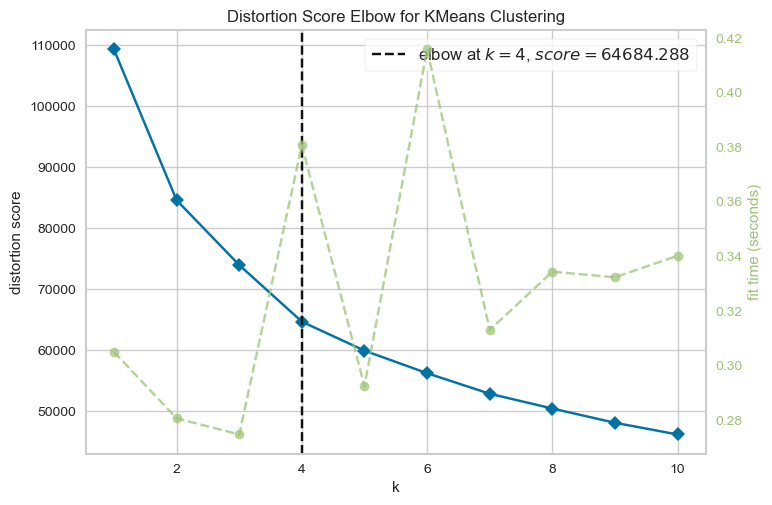

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

### đây ta tìm được k tối ưu là 4 và vẽ hình 2D và 3D cho nó

In [17]:
from sklearn.decomposition import PCA
def plot2Dand3D(k, data, option):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data)

    if option == '2D':
        pca = PCA(n_components=2)
        principal_component_2 = pca.fit_transform(data)
        pca_component_2_df = pd.DataFrame(data=principal_component_2 ,columns=["PCA1","PCA2"])
        plt.figure(figsize=(7, 7))
        ax = plt.subplot()
        ax.scatter(pca_component_2_df.PCA1, pca_component_2_df.PCA2, c=kmeans_model.labels_, cmap="cool")
        plt.show()
    elif option == '3D':
        pca = PCA(n_components=3)
        principal_component_3 = pca.fit_transform(data)
        pca_component_3_df = pd.DataFrame(data=principal_component_3 ,columns=["PCA1","PCA2","PCA3"])
        plt.figure(figsize=(7, 7))
        ax = plt.subplot(projection="3d")
        ax.scatter(pca_component_3_df.PCA1, pca_component_3_df.PCA2, pca_component_3_df.PCA3, c=kmeans_model.labels_, cmap="cool")
        plt.show()
    else:
        print('Error, this function recieves 2D and 3D option')


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


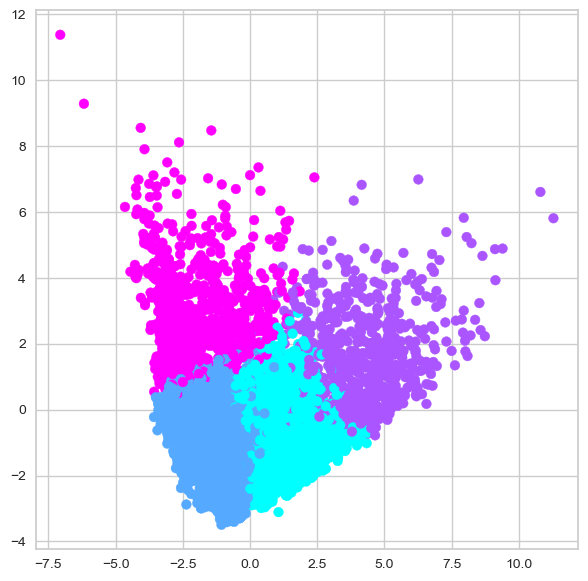

In [18]:
plot2Dand3D(elbow_method.elbow_value_, scaled_data, '2D')

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


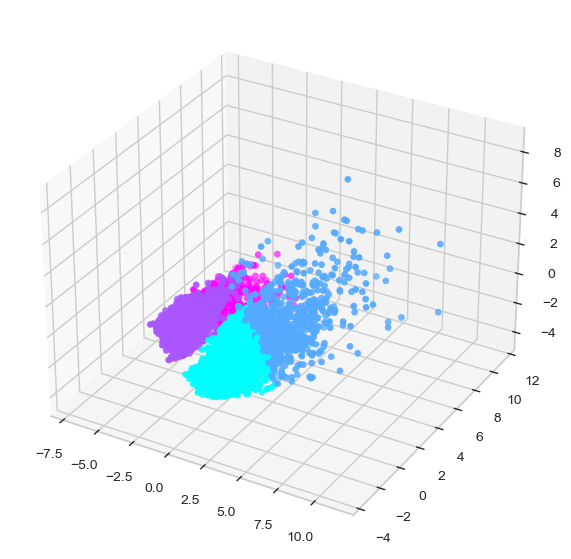

In [19]:
plot2Dand3D(elbow_method.elbow_value_, scaled_data, '3D')

### vẽ hình 2D và 3D cho k tối ưu + 1

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


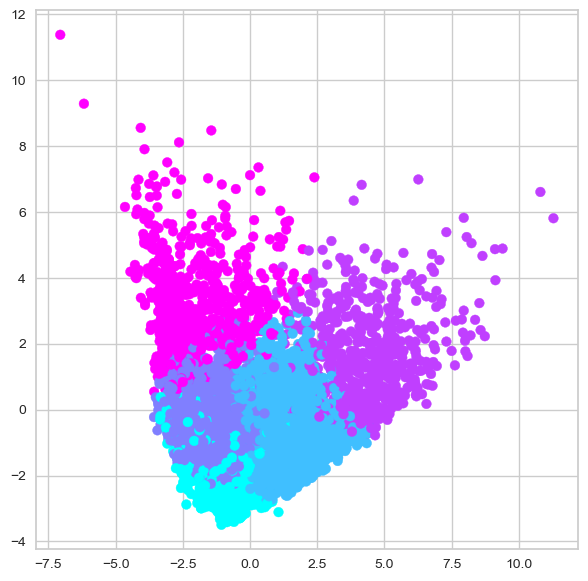

In [20]:
plot2Dand3D(elbow_method.elbow_value_+1, scaled_data, '2D')

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


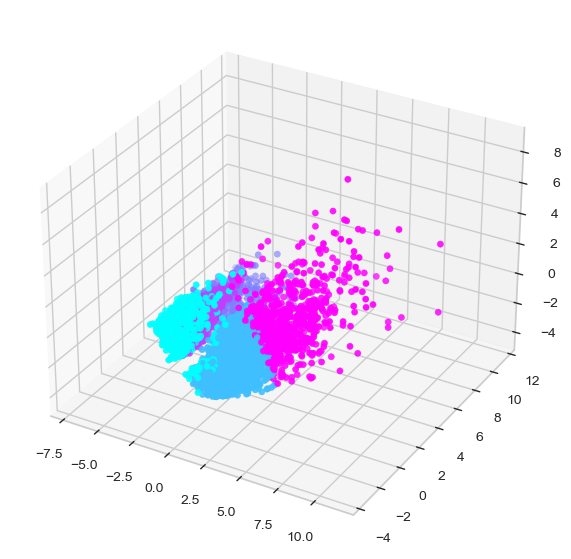

In [21]:
plot2Dand3D(elbow_method.elbow_value_+1, scaled_data, '3D')

# Model Part

In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

def build_model(data, n_components=2, n_clusters=3, auto=True):
    """
    Build a pipeline with scaling, PCA, and K-means clustering.

    Args:
        data (pandas.DataFrame): The input data.
        n_components (int): Number of components for PCA (default: 2).
        n_clusters (int): Number of clusters for K-means (default: 3).

    Returns:
        sklearn.pipeline.Pipeline: The built pipeline.
    """
    # Step 1: Scale the data
    scaler = StandardScaler()

    # Step 2: Perform PCA
    pca = PCA()

    # Step 3: Apply K-means clustering
    kmeans = KMeans()

    # Create the pipeline
    pipeline = Pipeline([
        ('scaling', scaler),
        ('pca', pca),
        ('kmeans', kmeans)
    ])

    # Define the parameter grid for grid search
    param_grid1 = {
        'pca__n_components': [n_components],
        'kmeans__n_clusters': [n_clusters]
    }


    param_grid2 = {
        'pca__n_components': [2, 3, 4],
        'kmeans__n_clusters': [3, 4, 5,6,7]
    }

    # Perform grid search on the pipeline
    if auto == True:
        grid_search = GridSearchCV(pipeline, param_grid2, cv=3)
    else:
        grid_search = GridSearchCV(pipeline, param_grid1, cv=3)
        
    grid_search.fit(data)

    # Obtain the best pipeline from the grid search
    #best_pipeline = grid_search.best_estimator_
    
    return grid_search


In [23]:
model_auto_param = build_model(df_no_outlier, 2, 4, True)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

In [24]:
model_auto_param.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=7))])

đây em để n_cluster từ 3 đển 7. nhưng chắc do dữ liệu nó khá gần nhau. giống như trên plot 2D và 3D các điểm dữ liệu nó nằm chồng lên. nên sự dụng elbow method đế xác định thì hợp lý hơn. chứ để nó model chọn ra best param thì luôn là cluster lớn nhất.

In [25]:
# Assuming you have your data stored in a pandas DataFrame called 'data'
model_auto = build_model(df_no_outlier, 2, 4, True)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

In [26]:
model_auto.predict(df_no_outlier)

array([2, 4, 0, ..., 5, 1, 1])

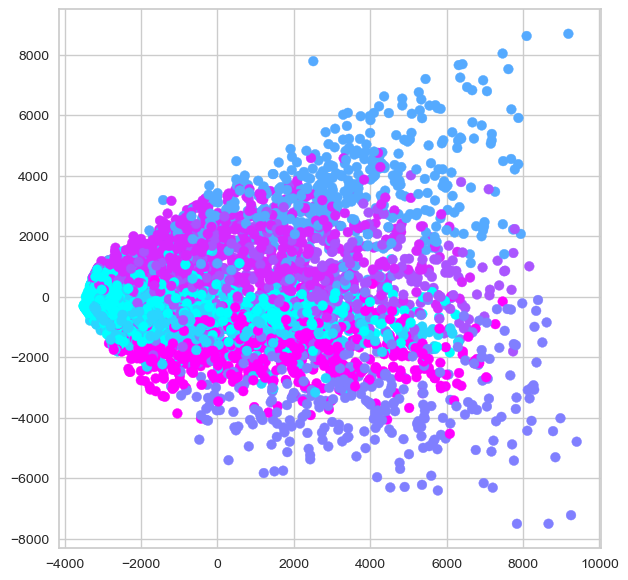

In [27]:
pca = PCA(n_components=2)
principal_component_2 = pca.fit_transform(df_no_outlier)
pca_component_2_df = pd.DataFrame(data=principal_component_2 ,columns=["PCA1","PCA2"])
plt.figure(figsize=(7, 7))
ax = plt.subplot()
ax.scatter(pca_component_2_df.PCA1, pca_component_2_df.PCA2, c=model_auto.predict(df_no_outlier), cmap="cool")
plt.show()

với k tới ưu

In [28]:
# Assuming you have your data stored in a pandas DataFrame called 'data'
model = build_model(df_no_outlier, 2, 4, False)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
model.predict(df_no_outlier)

array([0, 1, 2, ..., 2, 1, 1])

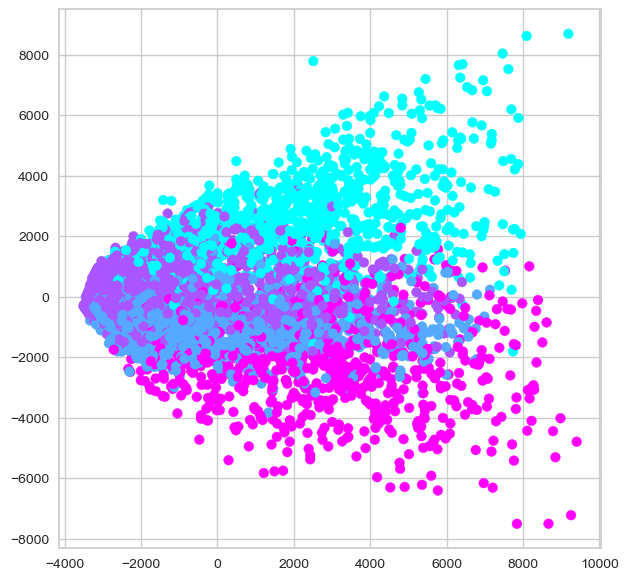

In [30]:
pca = PCA(n_components=2)
principal_component_2 = pca.fit_transform(df_no_outlier)
pca_component_2_df = pd.DataFrame(data=principal_component_2 ,columns=["PCA1","PCA2"])
plt.figure(figsize=(7, 7))
ax = plt.subplot()
ax.scatter(pca_component_2_df.PCA1, pca_component_2_df.PCA2, c=model.predict(df_no_outlier), cmap="cool")
plt.show()

### chọn  ra các dữ liệu theo từng cụm

In [31]:
cluster = model.predict(df_no_outlier)
cluster_0 = np.where(cluster==0) #index các data samples thuộc cluster 1
cluster_1 = np.where(cluster==1) #index các data samples thuộc cluster 2
cluster_2 = np.where(cluster==2) #index các data samples thuộc cluster 3
cluster_3 = np.where(cluster==3) #index các data samples thuộc cluster 4

In [32]:
#Lấy ra các data samples thuộc cluster 1
df_no_outlier.iloc[cluster_0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
42,4104.710798,1.000000,203.82,203.82,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4500.0,868.275275,1801.264841,0.000000,12,0
58,3971.138765,1.000000,0.00,0.00,0.00,224.575517,0.000000,0.000000,0.000000,0.181818,3,0,4000.0,764.938728,1600.212243,0.000000,11,0
59,5493.904060,1.000000,229.00,0.00,229.00,970.591332,0.416667,0.000000,0.333333,0.333333,4,6,6000.0,2110.557023,1895.026170,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,10,23,3000.0,3236.129237,384.230828,0.000000,6,2
8839,3271.424058,0.888889,1173.28,0.00,1173.28,4122.912645,0.888889,0.000000,0.777778,0.333333,4,16,5000.0,817.177789,999.725550,0.000000,9,3
8840,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9,2
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,2


# Discussion & Conclusion

In [33]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=len(df_no_outlier.columns))
pca.fit(scaled_data)
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
print(np.round(pca.explained_variance_ratio_,4)*100)

[30.33 18.34  9.47  8.24  5.86  5.14  5.06  3.46  3.21  2.79  2.03  1.66
  1.46  1.03  0.89  0.77  0.24  0.  ]


- theo phân tích thành phần chính trong thống kê thì tới thành thứ 5 thì tỷ lệ phương sai chiếm hơi 72% tổng phương sai (theo sách em từng đọc thì 72% -90%) nên theo em sẽ chọn 5 thành phần chính. 

In [34]:
from sklearn.cluster import KMeans
import numpy as np

def calculate_wcss(df_no_outlier, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_no_outlier)
    wcss = kmeans.inertia_
    return wcss

In [35]:
from sklearn.metrics import v_measure_score

# 'labels_true' are the ground truth labels of the data
# 'labels_pred' are the predicted cluster labels from the clustering algorithm
def V_measure(n):
    kmean = KMeans(n_clusters=n)
    kmean.fit(df_no_outlier)
    labels_pred = kmean.predict(df_no_outlier)
    labels_true = df_no_outlier.iloc[:,-1]
    v_measure = v_measure_score(labels_true, labels_pred)
    return v_measure
    

In [36]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
import numpy as np

def calculate_performance(data, n, model):
    # Obtain the predicted cluster labels from the model
    labels = model.predict(data)

    # Calculate the Silhouette Coefficient
    silhouette_avg = silhouette_score(data, labels)
    print("Silhouette Coefficient:", silhouette_avg)

    # Calculate the Calinski-Harabasz Index
    calinski_score = calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz Index:", calinski_score)

    # Calculate the Davies-Bouldin Index
    davies_bouldin__score = davies_bouldin_score(data, labels)
    print("Davies-Bouldin Index:", davies_bouldin__score)

    wcss = calculate_wcss(df_no_outlier, n)
    print("Within-Cluster Sum of Squares (WCSS):", wcss)

    v_measure = V_measure(n)
    print("V-Measure:", v_measure)

    return


điểm số k = 7

In [37]:
calculate_performance(df_no_outlier,7 ,model_auto)

Silhouette Coefficient: 0.0059453096184175986
Calinski-Harabasz Index: 632.9201987089897
Davies-Bouldin Index: 3.0637818013143034


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Within-Cluster Sum of Squares (WCSS): 30127444975.81844


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-Measure: 0.19103536854462091


điểm số k = 4

In [38]:
calculate_performance(df_no_outlier, 4, model)

Silhouette Coefficient: 0.06956553632773808
Calinski-Harabasz Index: 984.4764057877481
Davies-Bouldin Index: 2.44474752094182


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Within-Cluster Sum of Squares (WCSS): 39578316901.37077


c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


V-Measure: 0.20826099356339212


đây ta thấy các điểm số của k = 4 tốt hơn so với k = 7

em tính các điểm số dựa trên elbow method trên k = 4

Silhouette Coefficient: 0.06886959235831587
- Giá trị Silhouette Coefficient nằm trong khoảng từ -1 đến 1.
- Giá trị gần 1 cho thấy các điểm dữ liệu trong cùng một cụm gần nhau và tách biệt với các cụm khác.
- Giá trị gần -1 cho thấy các điểm dữ liệu trong cùng một cụm gần nhau nhưng gần với cụm khác.
- Giá trị gần 0 cho thấy sự chồng chéo hoặc gần như không có cấu trúc cụm.
- Trong trường hợp này, giá trị 0.06886959235831587 cho thấy sự chồng chéo hoặc không có cấu trúc cụm mạnh.

Calinski-Harabasz Index: 985.8199534903358
- Giá trị Calinski-Harabasz Index càng cao, càng cho thấy sự phân tách tốt giữa các cụm.
- Giá trị này không có một ngưỡng so sánh cụ thể nên cần so sánh với các kết quả khác hoặc ngưỡng tham chiếu để đánh giá hiệu suất.

Davies-Bouldin Index: 2.452559573293894
- Giá trị Davies-Bouldin Index càng thấp, càng cho thấy sự phân tách tốt và tách biệt giữa các cụm.
- Giá trị này không có một ngưỡng so sánh cụ thể nên cần so sánh với các kết quả khác hoặc ngưỡng tham chiếu để đánh giá hiệu suất.

Within-Cluster Sum of Squares (WCSS): 39578598508.68495
- WCSS đo lường tổng bình phương khoảng cách giữa các điểm dữ liệu và tâm cụm tương ứng của nó trong mô hình clustering.
- Giá trị WCSS càng thấp, cụm càng tốt và điểm dữ liệu càng gần tâm cụm.
- Đánh giá WCSS bằng cách so sánh với các kết quả khác hoặc ngưỡng tham chiếu để xác định mức độ tốt của mô hình clustering.

V-Measure: 0.2077101587926384
- V-Measure là một phép đo kết hợp giữa Precision và Recall để đo lường sự tương đồng giữa các phân cụm và nhãn thực tế.
- Giá trị V-Measure càng gần 1, càng cho thấy sự tương đồng tốt giữa các phân cụm và nhãn thực tế.
- Giá trị 0.2077101587926384 cho thấy sự tương đồng khá thấp giữa các phân cụm và nhãn thực tế.

Dựa trên các điểm số trên có thể kết luận rằng hiệu suất của mô hình clustering không đạt mức cao và các phân cụm không tốt tương đồng với nhãn thực tế. Để cải thiện hiệu suất, có thể cần điều chỉnh tham số hoặc xem xét các phương pháp clustering khác.

### thông tin các hệ số

- Silhouette Coefficient: Hệ số Silhouette đo độ gọn và sự tách biệt của các cụm. Nó tính toán Hệ số Hình bóng trung bình cho tất cả các mẫu trong tập dữ liệu, nằm trong khoảng từ -1 đến 1. Giá trị cao hơn biểu thị các cụm được xác định rõ hơn.
- Calinski-Harabasz Index: Chỉ số Calinski-Harabasz đánh giá tỷ lệ phân tán giữa các cụm so với phân tán bên trong cụm. Các giá trị cao hơn biểu thị các cụm được xác định rõ hơn và tách biệt hơn
- Davies-Bouldin Index: Chỉ số Davies-Bouldin đo mức độ tương tự trung bình giữa mỗi cụm và cụm tương tự nhất của nó. Các giá trị thấp hơn cho biết các cụm được xác định tốt hơn.

Khi đánh giá các mô hình phân khúc khách hàng, ta sử dụng kết hợp các chỉ số khác nhau để đánh giá hiệu suất của chúng. Dưới đây là một vài số liệu thường được sử dụng để phân khúc khách hàng:

- Silhouette Score: Silhouette Score đo lường chất lượng của phân khúc khách hàng bằng cách đánh giá mức độ nhỏ gọn và tách biệt của các cụm. Nó tính toán Hệ số Silhouette trung bình cho tất cả khách hàng, nằm trong khoảng từ -1 đến 1. Giá trị càng cao biểu thị các cụm được xác định rõ hơn và khác biệt hơn.

- Tổng bình phương trong cụm (WCSS): WCSS đo tổng bình phương khoảng cách giữa mỗi khách hàng và trung tâm của cụm được chỉ định của họ. Nó cung cấp một dấu hiệu cho thấy các khách hàng được nhóm chặt chẽ như thế nào trong các cụm tương ứng của họ. Các giá trị WCSS thấp hơn biểu thị các cụm nhỏ gọn hơn và được xác định rõ hơn.

- Tính đồng nhất, tính đầy đủ và thước đo chữ V: Các số liệu này hữu ích khi bạn có quyền truy cập vào nhãn sự thật cơ bản cho các phân khúc khách hàng. Tính đồng nhất đo lường mức độ mà tất cả các khách hàng trong một cụm nhất định thuộc về cùng một lớp thực. Tính đầy đủ đo lường mức độ mà tất cả các khách hàng từ cùng một lớp thực được gán cho cùng một cụm. Thước đo V là giá trị trung bình hài hòa của tính đồng nhất và đầy đủ, cung cấp đánh giá tổng thể về chất lượng phân khúc.

- Kiểm tra trực quan: Ngoài các số liệu định lượng, việc kiểm tra trực quan các cụm kết quả có thể có giá trị. Vẽ sơ đồ các cụm trong không gian giảm chiều (ví dụ: sử dụng PCA) hoặc trực quan hóa các đặc điểm của cụm có thể cung cấp thông tin chi tiết về chất lượng và khả năng diễn giải của phân đoạn.
